from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mushrooms_preprocessed_before_label-encoding.csv to mushrooms_preprocessed_before_label-encoding (1).csv


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Dataset Shape: (8124, 23)

First few rows:
   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-belo

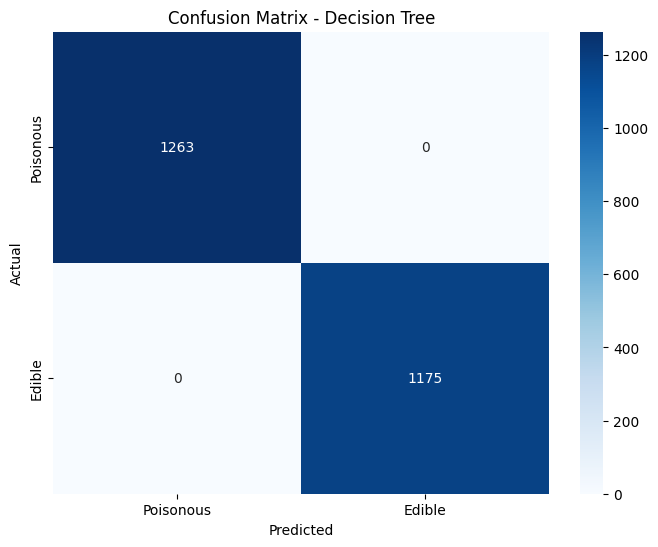


Top 10 Most Important Features:
                   feature  importance
8               gill-color    0.334466
19       spore-print-color    0.206553
20              population    0.187863
7                gill-size    0.111578
4                     odor    0.038310
21                 habitat    0.031148
3                  bruises    0.029327
9              stalk-shape    0.024418
14  stalk-color-below-ring    0.014828
10              stalk-root    0.009695


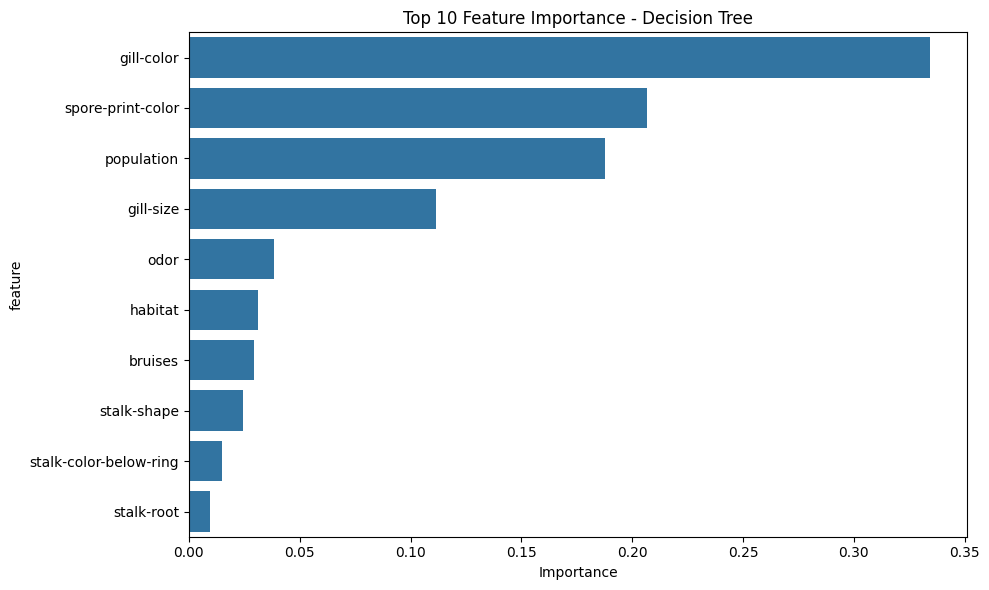


HYPERPARAMETER TUNING
Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 1.0000

Tuned Model Accuracy: 1.0000
Improvement: 0.0000
✅ Predictions saved as 'decision_tree/decision_tree_mushroom_predictions.csv'


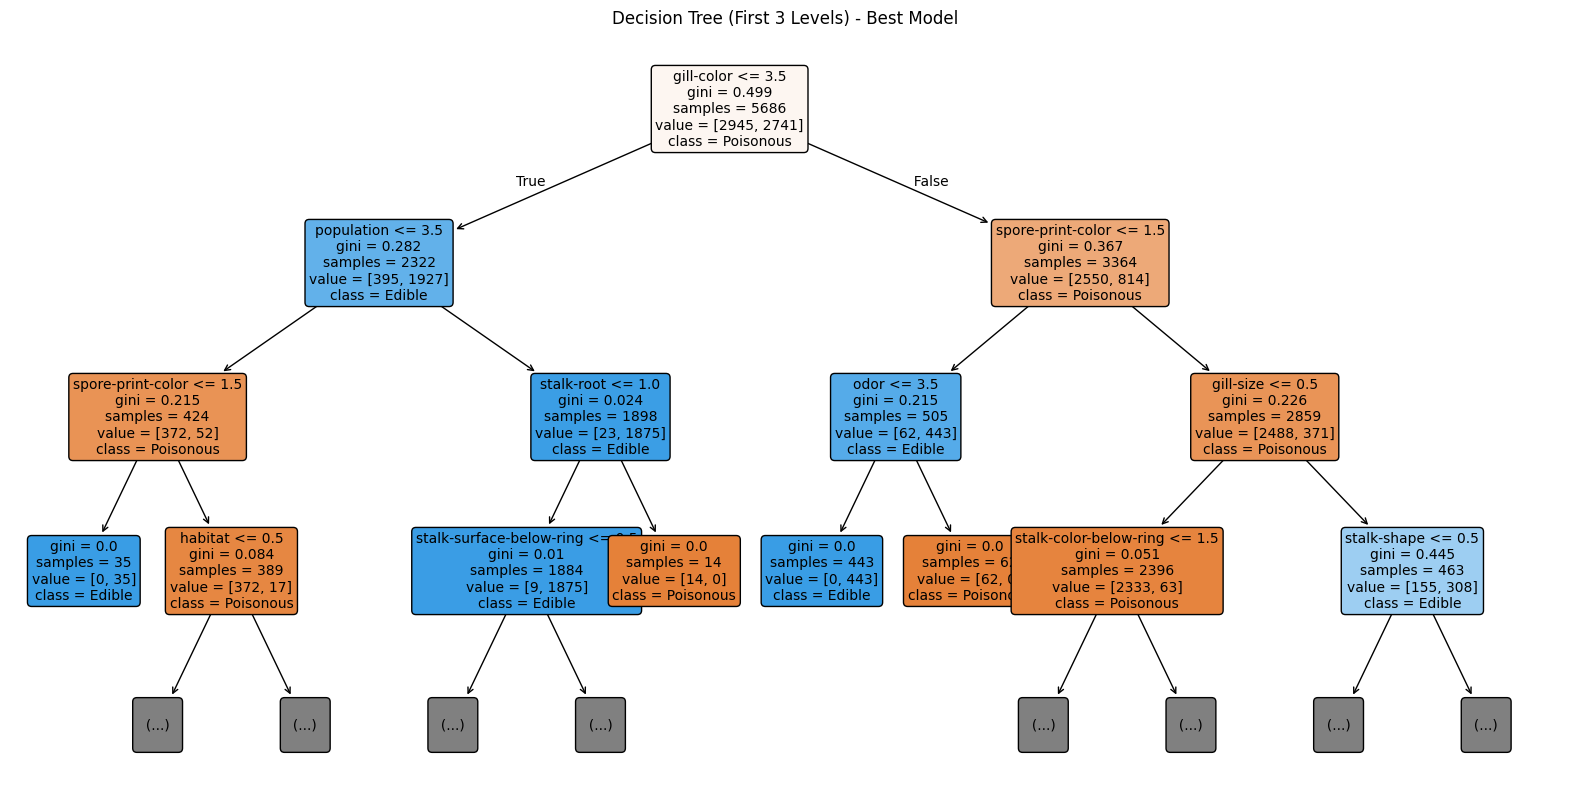

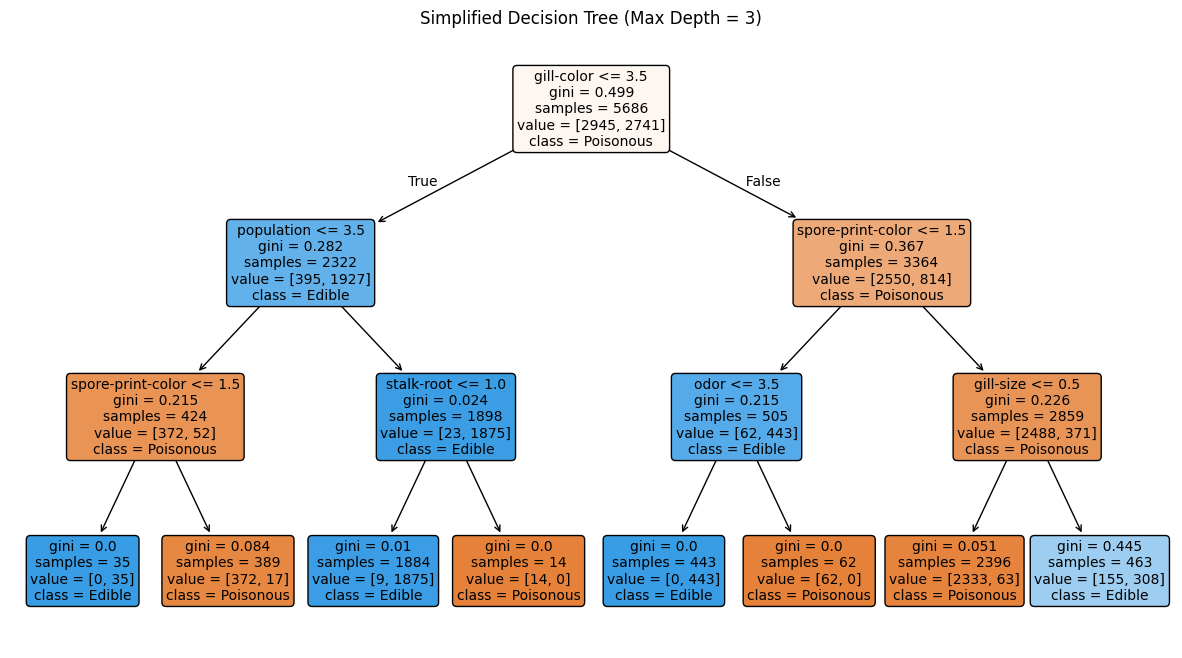


FINAL MODEL EVALUATION
Best Decision Tree Model:
Training Accuracy: 1.0000
Test Accuracy: 1.0000

Top 10 Features from Best Model:
                   feature  importance
8               gill-color    0.334466
19       spore-print-color    0.206553
20              population    0.187863
7                gill-size    0.111578
4                     odor    0.038310
21                 habitat    0.031148
3                  bruises    0.029327
9              stalk-shape    0.024418
14  stalk-color-below-ring    0.014828
10              stalk-root    0.009695


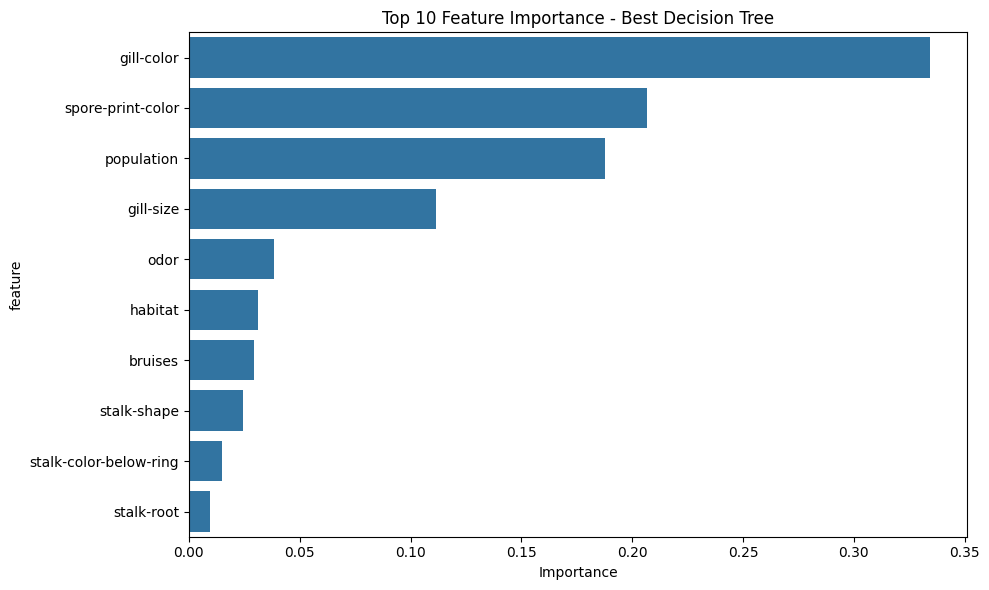

✅ Model saved in 'decision_tree/mushroom_decision_tree_model.pkl'

EXAMPLE PREDICTION
Sample features: [2 2 8 0 5 1 1 0 5 1 2 2 0 7 7 0 2 1 0 2 0 1]
Actual class: Poisonous (0)
Predicted class: Poisonous (0)
Prediction probabilities: [Poisonous: 1.000, Edible: 0.000]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')

os.makedirs('decision_tree', exist_ok=True)


# Load the dataset
df = pd.read_csv('final_phase1_mushrooms_preprocessed.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nClass distribution:")
print(df['class'].value_counts())
print("0 = Poisonous, 1 = Edible")

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Create and train the Decision Tree classifier
print("\nTraining Decision Tree Classifier...")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\n" + "="*50)
print("DECISION TREE PERFORMANCE")
print("="*50)

# Basic accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Cross-validation
cv_scores = cross_val_score(dt_classifier, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Poisonous', 'Edible']))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Poisonous', 'Edible'],
           yticklabels=['Poisonous', 'Edible'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Hyperparameter Tuning
print("\n" + "="*50)
print("HYPERPARAMETER TUNING")
print("="*50)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform grid search
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train with best parameters
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Evaluate tuned model
y_pred_tuned = best_dt.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"\nTuned Model Accuracy: {accuracy_tuned:.4f}")
print(f"Improvement: {accuracy_tuned - accuracy:.4f}")

# --- NOW save predictions ---
y_pred_proba_full = best_dt.predict_proba(X_test)

predictions_df = X_test.copy()
predictions_df['Actual_Class'] = y_test.values
predictions_df['Predicted_Class'] = y_pred_tuned
predictions_df['Prob_Poisonous'] = y_pred_proba_full[:, 0]
predictions_df['Prob_Edible'] = y_pred_proba_full[:, 1]

predictions_df['Actual_Class_Label'] = predictions_df['Actual_Class'].map({0:'Poisonous', 1:'Edible'})
predictions_df['Predicted_Class_Label'] = predictions_df['Predicted_Class'].map({0:'Poisonous', 1:'Edible'})

predictions_df.to_csv('decision_tree/decision_tree_mushroom_predictions.csv', index=False)
print("✅ Predictions saved as 'decision_tree/decision_tree_mushroom_predictions.csv'")


# Visualize the Decision Tree (first 3 levels for readability)
plt.figure(figsize=(20, 10))
plot_tree(best_dt,
          feature_names=X.columns,
          class_names=['Poisonous', 'Edible'],
          filled=True,
          rounded=True,
          max_depth=3,  # Limit depth for readability
          fontsize=10)
plt.title('Decision Tree (First 3 Levels) - Best Model')
plt.show()

# Compare with simpler tree for better visualization
simple_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
simple_dt.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(simple_dt,
          feature_names=X.columns,
          class_names=['Poisonous', 'Edible'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Simplified Decision Tree (Max Depth = 3)')
plt.show()

# Final evaluation
print("\n" + "="*50)
print("FINAL MODEL EVALUATION")
print("="*50)

print("Best Decision Tree Model:")
print(f"Training Accuracy: {best_dt.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {best_dt.score(X_test, y_test):.4f}")

# Feature importance of best model
best_feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_dt.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Features from Best Model:")
print(best_feature_importance.head(10))

# Plot best model feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=best_feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance - Best Decision Tree')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Save the model (optional)
import joblib
joblib.dump(best_dt, 'decision_tree/mushroom_decision_tree_model.pkl')
print("✅ Model saved in 'decision_tree/mushroom_decision_tree_model.pkl'")

# Example prediction
print("\n" + "="*50)
print("EXAMPLE PREDICTION")
print("="*50)

# Take a random sample from test set for demonstration
sample_idx = np.random.randint(0, len(X_test))
sample_features = X_test.iloc[sample_idx:sample_idx+1]
actual_class = y_test.iloc[sample_idx]
prediction = best_dt.predict(sample_features)[0]
prediction_proba = best_dt.predict_proba(sample_features)[0]

print(f"Sample features: {sample_features.values[0]}")
print(f"Actual class: {'Edible' if actual_class == 1 else 'Poisonous'} ({actual_class})")
print(f"Predicted class: {'Edible' if prediction == 1 else 'Poisonous'} ({prediction})")
print(f"Prediction probabilities: [Poisonous: {prediction_proba[0]:.3f}, Edible: {prediction_proba[1]:.3f}]")

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
import joblib

# Train the final Decision Tree (best parameters from your grid search)
best_dt.fit(X_train, y_train)

# Export the tree to DOT format
dot_data = export_graphviz(
    best_dt,
    out_file=None,  # keep in memory
    feature_names=X.columns,
    class_names=['Poisonous', 'Edible'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Create graph from DOT data
graph = graphviz.Source(dot_data)

# Save as PNG
graph.render("decision_tree/mushroom_decision_tree_full", format="png", cleanup=True)

print("✅ Full Decision Tree saved as 'mushroom_decision_tree_full.png'")


✅ Full Decision Tree saved as 'mushroom_decision_tree_full.png'



MODEL PERFORMANCE
Accuracy: 1.000000000

Class       Precision   Recall      F1-score    Support   
------------------------------------------------------------
Poisonous   1.000000000 1.000000000 1.000000000 783       
Edible      1.000000000 1.000000000 1.000000000 842       
------------------------------------------------------------
Macro Avg   1.000000000 1.000000000 1.000000000 1625      
Weighted Avg1.000000000 1.000000000 1.000000000 1625      

ACTUAL vs PREDICTED MATRIX
Metric         Value
------------------------------
True Positive  842
False Positive 0
True Negative  783
False Negative 0


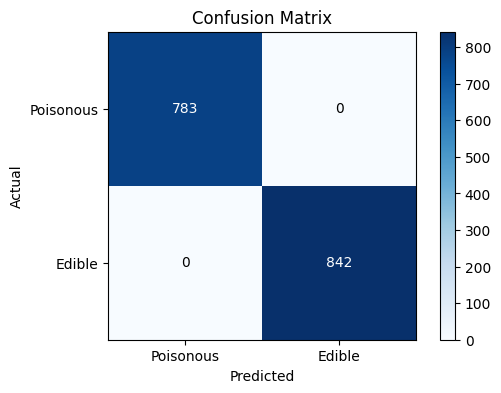


Predictions saved as 'knn_mushroom_predictions.csv'

EXAMPLE PREDICTION
Sample: [[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]]
Actual: Edible (1)
Predicted: Edible (1)
Probabilities: [Poisonous: 0.000000000, Edible: 1.000000000]

5-Fold Cross-Validation Accuracy:
Mean: 1.000000000, Std: 0.000000000

Error Interpretation:
--------------------------------------------------
False Positives (Poisonous predicted as Edible): 0
False Negatives (Edible predicted as Poisonous): 0

• False Positives (FP): Risky, as poisonous mushrooms are classified as edible.
• False Negatives (FN): Safer, but edible mushrooms are incorrectly rejected.

Overall Accuracy: 1.0000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("mushrooms_preprocessed_before_label-encoding.csv")

target = "class"
X = df.drop(columns=[target])
y = df[target].map({'p':0, 'e':1})

cat_cols = X.select_dtypes(include=["object"]).columns
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = enc.fit_transform(X[cat_cols])

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

acc = accuracy_score(y_test, preds)
prec, rec, f1, sup = precision_recall_fscore_support(y_test, preds)

# Model Performance
print("\n" + "="*50)
print("MODEL PERFORMANCE")
print("="*50)
print(f"Accuracy: {acc:.9f}\n")
print(f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-score':<12}{'Support':<10}")
print("-"*60)

classes = ['Poisonous', 'Edible']
for i, cls in enumerate(classes):
    print(f"{cls:<12}{prec[i]:<12.9f}{rec[i]:<12.9f}{f1[i]:<12.9f}{sup[i]:<10}")

macro_prec = prec.mean()
macro_rec = rec.mean()
macro_f1 = f1.mean()
total_sup = sup.sum()

print("-"*60)
print(f"{'Macro Avg':<12}{macro_prec:<12.9f}{macro_rec:<12.9f}{macro_f1:<12.9f}{total_sup:<10}")
weighted_prec = (prec * sup / total_sup).sum()
weighted_rec = (rec * sup / total_sup).sum()
weighted_f1 = (f1 * sup / total_sup).sum()
print(f"{'Weighted Avg':<12}{weighted_prec:<12.9f}{weighted_rec:<12.9f}{weighted_f1:<12.9f}{total_sup:<10}")

# Confusion Matrix
cm = confusion_matrix(y_test, preds)
tn, fp, fn, tp = cm.ravel()

print("\n" + "="*50)
print("ACTUAL vs PREDICTED MATRIX")
print("="*50)
print(f"{'Metric':<15}{'Value'}")
print("-"*30)
print(f"{'True Positive':<15}{tp}")
print(f"{'False Positive':<15}{fp}")
print(f"{'True Negative':<15}{tn}")
print(f"{'False Negative':<15}{fn}")

plt.figure(figsize=(6,4))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ['Poisonous','Edible'])
plt.yticks([0,1], ['Poisonous','Edible'])
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Save predictions
results = pd.DataFrame(X_test, columns=feature_names)
results['Actual'] = y_test.values
results['Predicted'] = preds
results.to_csv("knn_mushroom_predictions.csv", index=False)
print("\nPredictions saved as 'knn_mushroom_predictions.csv'")

# Example prediction
idx = np.random.randint(0, len(X_test))
sample = X_test[idx:idx+1]
actual = y_test.iloc[idx]
pred = knn.predict(sample)[0]
proba = knn.predict_proba(sample)[0]

print("\n" + "="*50)
print("EXAMPLE PREDICTION")
print("="*50)
print(f"Sample: {sample}")
print(f"Actual: {'Edible' if actual==1 else 'Poisonous'} ({actual})")
print(f"Predicted: {'Edible' if pred==1 else 'Poisonous'} ({pred})")
print(f"Probabilities: [Poisonous: {proba[0]:.9f}, Edible: {proba[1]:.9f}]")

# 5-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X_encoded, y, cv=cv)
print("\n5-Fold Cross-Validation Accuracy:")
print(f"Mean: {cv_scores.mean():.9f}, Std: {cv_scores.std():.9f}")

# Error interpretation
print("\nError Interpretation:")
print("-"*50)
print(f"False Positives (Poisonous predicted as Edible): {fp}")
print(f"False Negatives (Edible predicted as Poisonous): {fn}\n")
print("• False Positives (FP): Risky, as poisonous mushrooms are classified as edible.")
print("• False Negatives (FN): Safer, but edible mushrooms are incorrectly rejected.")
print(f"\nOverall Accuracy: {acc:.4f}")



MODEL PERFORMANCE
Accuracy: 1.000000

Class       Precision   Recall      F1-score    Support   
------------------------------------------------------------
Poisonous   1.000000    1.000000    1.000000    783       
Edible      1.000000    1.000000    1.000000    842       
------------------------------------------------------------
Macro Avg   1.000000    1.000000    1.000000    1625      
Weighted Avg1.000000    1.000000    1.000000    1625      


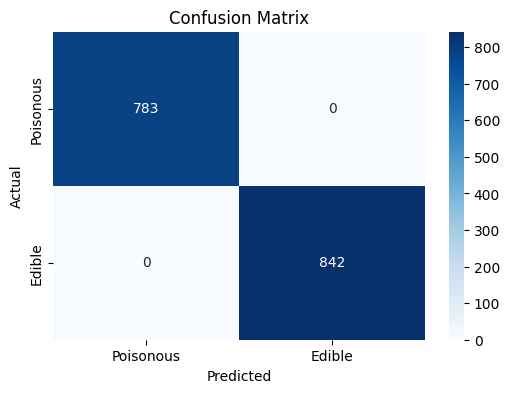

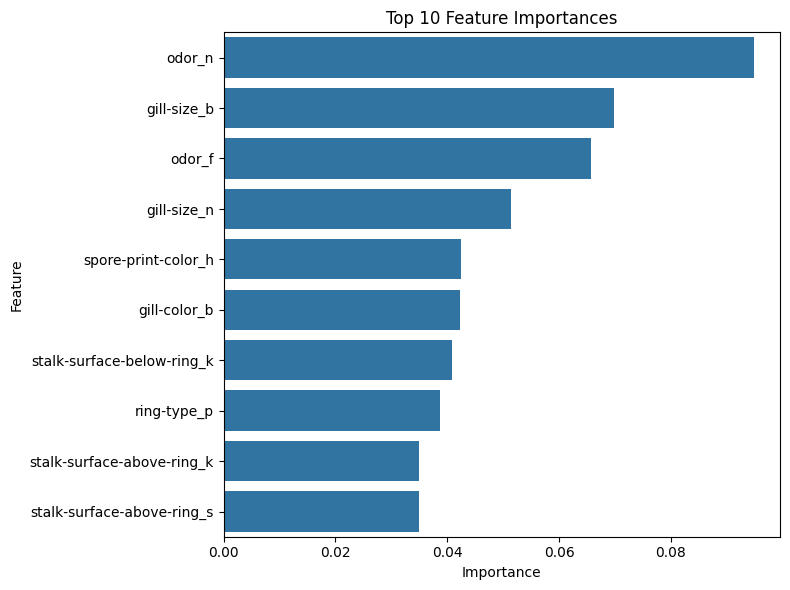


Top 10 Important Features:
                        Feature  Importance
27                      odor_n    0.094778
35                 gill-size_b    0.069844
24                      odor_f    0.065637
36                 gill-size_n    0.051386
95         spore-print-color_h    0.042384
37                gill-color_b    0.042220
60  stalk-surface-below-ring_k    0.040840
93                 ring-type_p    0.038668
56  stalk-surface-above-ring_k    0.035021
57  stalk-surface-above-ring_s    0.034948

Predictions saved as 'rf_mushroom_predictions.csv'

EXAMPLE PREDICTION
Sample: [[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]]
Actual: Poisonous (0)
Predicted: Poisonous (0)
Probabiliti

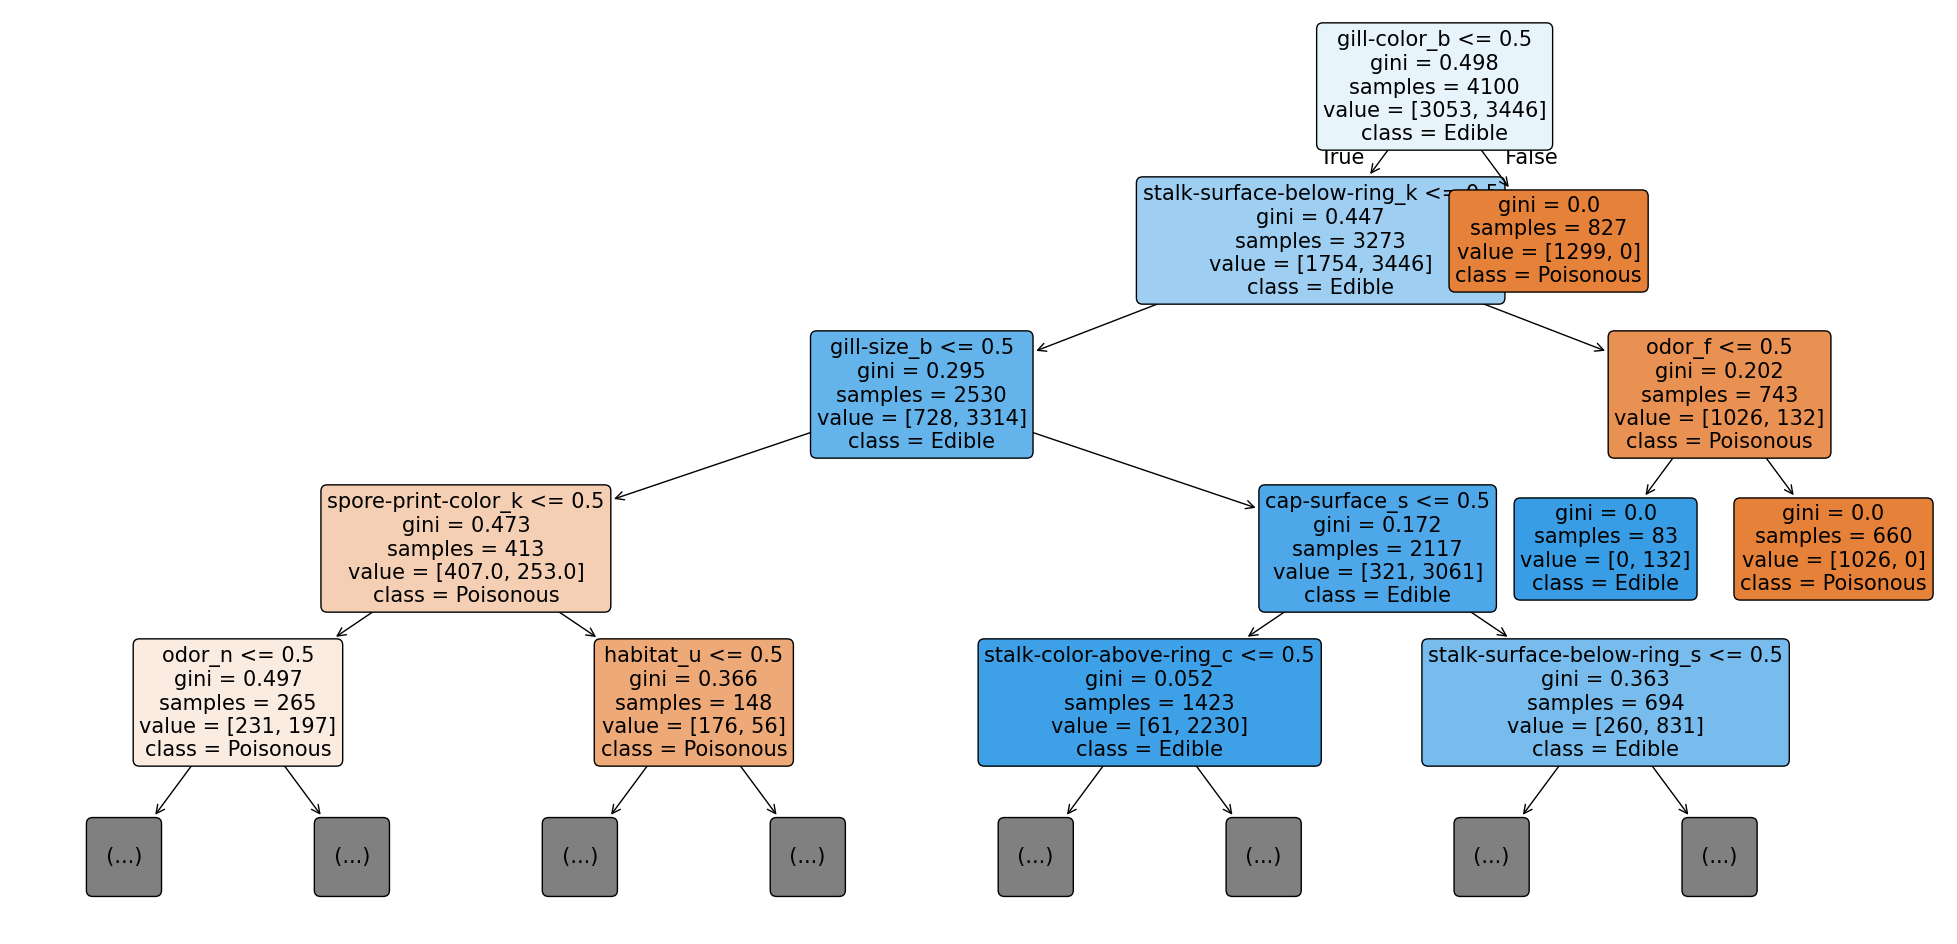

In [ ]:

#### random forest ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

df = df = pd.read_csv("mushrooms_preprocessed_before_label-encoding.csv")


target = "class"
X = df.drop(columns=[target])
y = df[target].map({'p':0,'e':1})

cat_cols = X.select_dtypes(include=['object']).columns
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = enc.fit_transform(X[cat_cols])

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

preds = rf.predict(X_test)

acc = accuracy_score(y_test, preds)
prec, rec, f1, sup = precision_recall_fscore_support(y_test, preds)

print("\n" + "="*50)
print("MODEL PERFORMANCE")
print("="*50)
print(f"Accuracy: {acc:.6f}\n")
print(f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-score':<12}{'Support':<10}")
print("-"*60)
classes = ['Poisonous','Edible']
for i, cls in enumerate(classes):
    print(f"{cls:<12}{prec[i]:<12.6f}{rec[i]:<12.6f}{f1[i]:<12.6f}{sup[i]:<10}")

macro_prec = prec.mean()
macro_rec = rec.mean()
macro_f1 = f1.mean()
total_sup = sup.sum()
print("-"*60)
print(f"{'Macro Avg':<12}{macro_prec:<12.6f}{macro_rec:<12.6f}{macro_f1:<12.6f}{total_sup:<10}")
weighted_prec = (prec * sup / total_sup).sum()
weighted_rec = (rec * sup / total_sup).sum()
weighted_f1 = (f1 * sup / total_sup).sum()
print(f"{'Weighted Avg':<12}{weighted_prec:<12.6f}{weighted_rec:<12.6f}{weighted_f1:<12.6f}{total_sup:<10}")

cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

feat_imp = rf.feature_importances_
feat_names = enc.get_feature_names_out(cat_cols)
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()
print("\nTop 10 Important Features:\n", feat_df)

results = pd.DataFrame(X_test, columns=feat_names)
results['Actual'] = y_test.values
results['Predicted'] = preds
results.to_csv("rf_mushroom_predictions.csv", index=False)
print("\nPredictions saved as 'rf_mushroom_predictions.csv'")

idx = np.random.randint(0, len(X_test))
sample = X_test[idx:idx+1]
actual = y_test.iloc[idx]
pred = rf.predict(sample)[0]
proba = rf.predict_proba(sample)[0]

print("\n" + "="*50)
print("EXAMPLE PREDICTION")
print("="*50)
print(f"Sample: {sample}")
print(f"Actual: {'Edible' if actual==1 else 'Poisonous'} ({actual})")
print(f"Predicted: {'Edible' if pred==1 else 'Poisonous'} ({pred})")
print(f"Probabilities: [Poisonous: {proba[0]:.3f}, Edible: {proba[1]:.3f}]")

cv_scores = cross_val_score(rf, X_encoded, y, cv=5, scoring='accuracy', n_jobs=-1)
print("\n5-Fold Cross-Validation Accuracy:")
print(f"Mean: {cv_scores.mean():.6f}, Std: {cv_scores.std():.6f}")



from sklearn.tree import plot_tree

plt.figure(figsize=(25,12))
plot_tree(
    rf.estimators_[0],
    feature_names=enc.get_feature_names_out(cat_cols),
    class_names=['Poisonous', 'Edible'],
    filled=True,
    rounded=True,
    max_depth=4,
    fontsize=15
)
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00

DATASET INFO
Shape: (8124, 23)
First 5 rows:
   class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring st

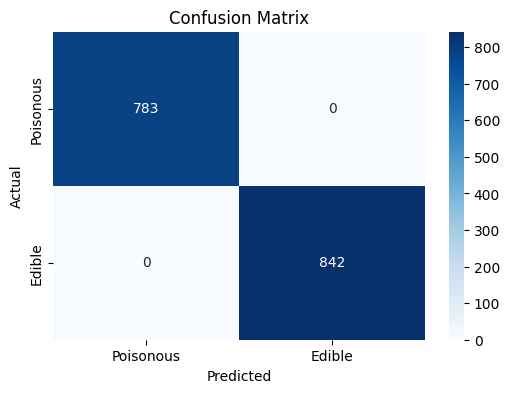


Top 10 Important Features:
                      Feature  Importance
4                       odor   64.809542
19         spore-print-color   15.347863
7                  gill-size    4.878055
9                stalk-shape    4.191185
17               ring-number    2.934249
12  stalk-surface-below-ring    1.858828
11  stalk-surface-above-ring    1.727400
3                    bruises    1.255586
20                population    0.787370
1                cap-surface    0.773453


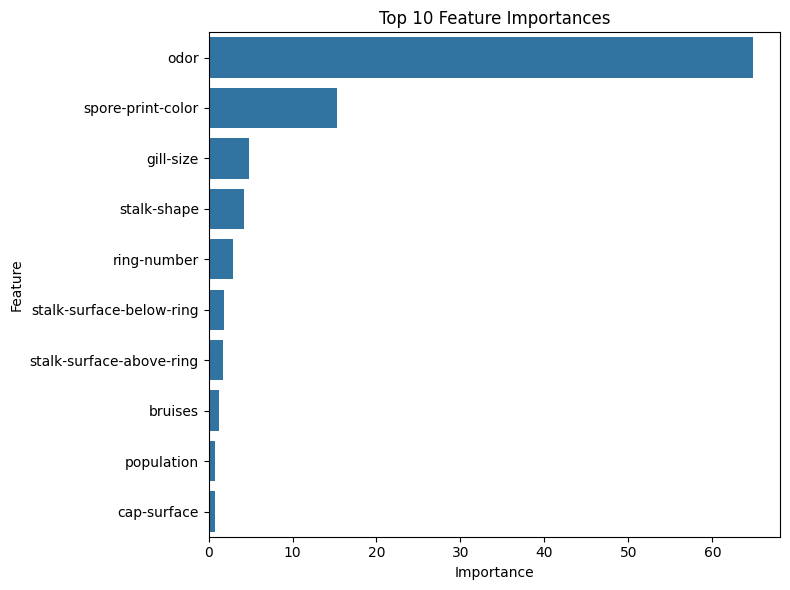


Predictions saved as 'catboost_mushroom_predictions.csv'

EXAMPLE PREDICTION
Sample: ['f' 's' 'w' 't' 'f' 'f' 'c' 'b' 'h' 't' 'b' 's' 's' 'w' 'w' 'p' 'w' 'o'
 'p' 'h' 'v' 'u']
Actual: Poisonous (0)
Predicted: Poisonous (0)
Probabilities: [Poisonous: 0.997, Edible: 0.003]
Training on fold [0/5]

bestTest = 1
bestIteration = 23

Training on fold [1/5]

bestTest = 1
bestIteration = 12

Training on fold [2/5]

bestTest = 1
bestIteration = 12

Training on fold [3/5]

bestTest = 0.9993842365
bestIteration = 24

Training on fold [4/5]

bestTest = 0.9987684729
bestIteration = 21


5-Fold CV Accuracy: 0.999631 (+/- 0.001102)


AttributeError: '_catboost._CatBoost' object has no attribute '_export_model'

In [ ]:
"""CatBoost Classification on Categorical """
!pip install catboost --quiet
!pip install graphviz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import warnings



warnings.filterwarnings('ignore')

# Load dataset
mushrooms = pd.read_csv("mushrooms_preprocessed_before_label-encoding.csv")

# Features and target
target_column = "class"
X = mushrooms.drop(columns=[target_column])
y = mushrooms[target_column].map({'p': 0, 'e': 1})

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Dataset info
print("\n" + "="*40)
print("DATASET INFO")
print("="*40)
print("Shape:", mushrooms.shape)
print("First 5 rows:\n", mushrooms.head())
print("Class counts:\n", mushrooms['class'].value_counts())

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# CatBoost model
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    early_stopping_rounds=50,
    verbose=100
)

# Train using Pool
train_pool = Pool(X_train, y_train, cat_features=cat_cols)
test_pool = Pool(X_test, y_test, cat_features=cat_cols)
model.fit(train_pool, eval_set=test_pool)

# Predictions
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
prec, rec, f1, sup = precision_recall_fscore_support(y_test, preds)

# Model performance
print("\n" + "="*50)
print("MODEL PERFORMANCE")
print("="*50)
print(f"Accuracy: {acc:.6f}\n")
print(f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-score':<12}{'Support':<10}")
print("-"*60)
classes = ['Poisonous', 'Edible']
for i, cls in enumerate(classes):
    print(f"{cls:<12}{prec[i]:<12.6f}{rec[i]:<12.6f}{f1[i]:<12.6f}{sup[i]:<10}")

macro_prec = prec.mean()
macro_rec = rec.mean()
macro_f1 = f1.mean()
total_sup = sup.sum()
print("-"*60)
print(f"{'Macro Avg':<12}{macro_prec:<12.6f}{macro_rec:<12.6f}{macro_f1:<12.6f}{total_sup:<10}")

weighted_prec = (prec * sup / total_sup).sum()
weighted_rec = (rec * sup / total_sup).sum()
weighted_f1 = (f1 * sup / total_sup).sum()
print(f"{'Weighted Avg':<12}{weighted_prec:<12.6f}{weighted_rec:<12.6f}{weighted_f1:<12.6f}{total_sup:<10}")

# Confusion Matrix
cm = confusion_matrix(y_test, preds)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
feat_imp = model.get_feature_importance()
feat_names = X.columns
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False).head(10)
print("\nTop 10 Important Features:\n", feat_df)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

# Save predictions
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = preds
results.to_csv("catboost_mushroom_predictions.csv", index=False)
print("\nPredictions saved as 'catboost_mushroom_predictions.csv'")

# Example Prediction
idx = np.random.randint(0, len(X_test))
sample = X_test.iloc[idx:idx+1]
actual = y_test.iloc[idx]
pred = model.predict(sample)[0]
proba = model.predict_proba(sample)[0]

print("\n" + "="*50)
print("EXAMPLE PREDICTION")
print("="*50)
print(f"Sample: {sample.values[0]}")
print(f"Actual: {'Edible' if actual==1 else 'Poisonous'} ({actual})")
print(f"Predicted: {'Edible' if pred==1 else 'Poisonous'} ({pred})")
print(f"Probabilities: [Poisonous: {proba[0]:.3f}, Edible: {proba[1]:.3f}]")

# 5-Fold CV
full_pool = Pool(X, y, cat_features=cat_cols)
params = {
    'iterations': 500,
    'learning_rate': 0.05,
    'depth': 6,
    'loss_function': 'Logloss',
    'eval_metric': 'Accuracy',
    'random_seed': 42,
    'early_stopping_rounds': 50,
    'verbose': False
}

cv_results = cv(full_pool, params, fold_count=5, shuffle=True, partition_random_seed=42)
mean_cv = cv_results['test-Accuracy-mean'].iloc[-1]
std_cv = cv_results['test-Accuracy-std'].iloc[-1]
print(f"\n5-Fold CV Accuracy: {mean_cv:.6f} (+/- {std_cv*2:.6f})")



from catboost import CatBoostClassifier
import graphviz

# Export tree as DOT (JSON → DOT workaround)
model.save_model("model.json", format="json")  # save model

# Use built-in CatBoost function for a single tree to DOT
# CatBoost >=1.1 can export a single tree
tree_dot = model._object._export_model(
    0,             # tree index
    format='dot',  # DOT format
    pool=train_pool
)

# Render using graphviz
graph = graphviz.Source(tree_dot)
graph.format = 'png'
graph.render("tree_neat", view=True)  # saves as tree_neat.png



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# 1. Load the Raw dataset (The 'Before' file)
df_raw = pd.read_csv('mushrooms_preprocessed_before_label-encoding.csv')

# 2. Preprocessing: One-Hot Encoding
# Encode the Target 'class' (p/e) into numbers (1/0)
le = LabelEncoder()
y = le.fit_transform(df_raw['class'])

# One-Hot Encode the Features (Convert text columns to binary columns)
X = pd.get_dummies(df_raw.drop('class', axis=1))

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Bernoulli Naive Bayes Model
# We use Bernoulli because One-Hot encoding creates binary (0/1) features
model_onehot = BernoulliNB()
model_onehot.fit(X_train, y_train)

# 5. Make Predictions
y_pred = model_onehot.predict(X_test)
y_prob = model_onehot.predict_proba(X_test)[:, 1] # Probability for ROC curve

# 6. Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Model 2 (One-Hot Encoded) Results ---")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# 7. Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - One-Hot Encoding (BernoulliNB)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 8. Plot ROC Curve (Esraa asked for plots!)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One-Hot Encoding')
plt.legend(loc="lower right")
plt.show()